# MNIST Dataset

## Introduction

We've now talked about why we need machine learning (some relationships are too complex to represent manually), we've looked at the different components of machine learning (model, parameters, loss functions, optimizers), implementing machine learning in a small scale application (linear regression with stochastic gradient descent), and how PyTorch gives us the tools to have more power over our machine learning. Now we are going to combine all of those ideas together to write a model which will identify hand written numbers for us.

### The Dataset

The MNIST dataset is a curated set of hand written numbers that is commonly used as a starting point for machine learning. The original dataset created by NIST (National Institute for Standards and Technology) was leveraged in various goverment tasks related to OCR (Optical Character Recognition). Think tasks like reading tax forms, postal addresses, other manual entry processes. MNIST is a subset of the dataset selected to be more ideal for machine learning with a more sophisticated test/training split. The dataset includes 60,000 images in the training set and 10,000 images in the test set.

### CNNs

Convolutional Neural Networks (CNNs) are a special kind of neural network designed for learning features what can assist in recognizing patterns in typically grid like data. They are inspired by how perception works in the brain, but like all neural networks are a simplifaction.

If we remember back to the template matching at the begining, for template matching to work, we need a good starting template. CNNs provide us a way to learn more complex features. Interestingly CNNs still effectivly apply a template matching like algorithm, but leveraging machine learning to learn the templates for us.

#### AlexNet

CNNs for object detection have been on of the widest applications of machine learning (before LLMs). AlexNet is a CNN developed at the University of Toronto to detect up to 1,000 distinct objects and is often times a starting point for making for specifically tuned CNNs since the heavy lifting of training a lot of the parameters has been taken care of by the team.

* For more information on the MNIST dataset: https://en.wikipedia.org/wiki/MNIST_database
* MNIST CNN Visualizer: https://adamharley.com/nn_vis/
* GoogLeNet Visualizer: https://distill.pub/2017/feature-visualization/

## Explore the Dataset

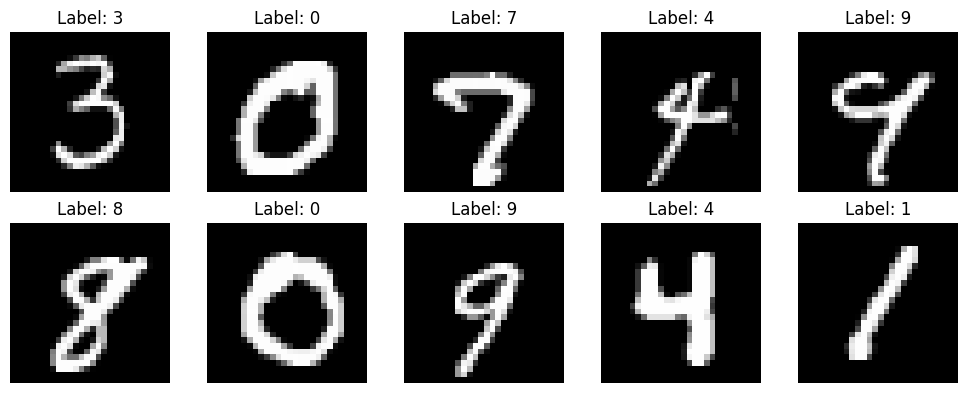

In [29]:
from torchvision import datasets, transforms
import torch
from matplotlib import pyplot as plt

# A series of operations that will apply to each image
# 1. Convert the image into a PyTorch tensor
# 2. Normalize the tensors to have a mean of 0.1307 and stand deviation of 0.3081
#    these are already known values for MNIST and is a common practice to normalize
#    data as it will stop the features we learn later on from out weighing each other
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Using PyTorch's built in data for MNIST, we are telling it to download the training set
train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)

# The data loader then specifies how we can load in the downloaded images into Python
dataloader = torch.utils.data.DataLoader(train_set, batch_size=10)

# Function to display images taken from https://pythonguides.com/pytorch-mnist/
def show_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()

    for i in range(10):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Now we will pull out 10 images to look at
images, labels = next(iter(dataiter))

# Show images
show_images(images, labels)